### Loan Prediction

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/loan-prediction-problem-dataset/test_Y3wMUE5_7gLdaTN.csv
/kaggle/input/loan-prediction-problem-dataset/train_u6lujuX_CVtuZ9i.csv


**Objective**<br>
Building a predictive model that determines the eligibility of loan applicants based on dataset.

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("/kaggle/input/loan-prediction-problem-dataset/train_u6lujuX_CVtuZ9i.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


#### Requirement
Bring the dataset to a state where it can be used for prediction.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
sum(data.isnull().sum()>0)

7

**Observation**<br>
* There are 614 rows in the dataset.
* There are 7 columns where we see of null values.

In [6]:
# Understanding the numerical values columns
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


**Observations**<br>
The Applicant Income, Coapplicant Income and Loan Amount mean and max value has a huge gap, which shows presence of Outliers.

In [7]:
# Understanding the categorical data columns
data.describe(include='object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


**Observations**<br>
The Gender,married ,Education, Self employed and Loan status has imbalanced data

In [8]:
data['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

<Axes: xlabel='Loan_Status', ylabel='count'>

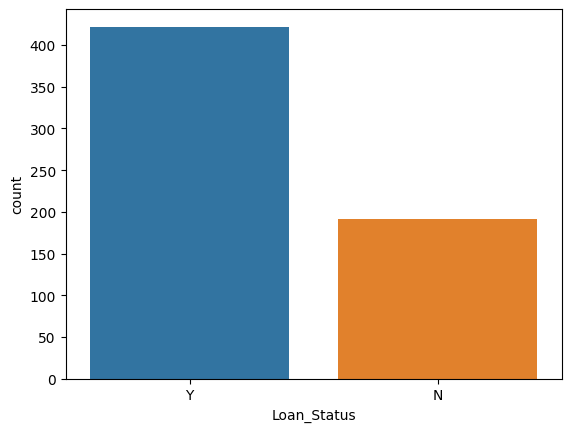

In [9]:
sns.countplot(data,x=data['Loan_Status'])

In [10]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
# Fixing out the null values
# Numerical values with the median and Categorical values with the mode
# Null value columns: Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, Credit_History

# Categorical data
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

# Numerical data
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].median())
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].median())


In [12]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

**Observations**<br>
All the null value columns has been addressed.

#### Detecting Outliers and handling them

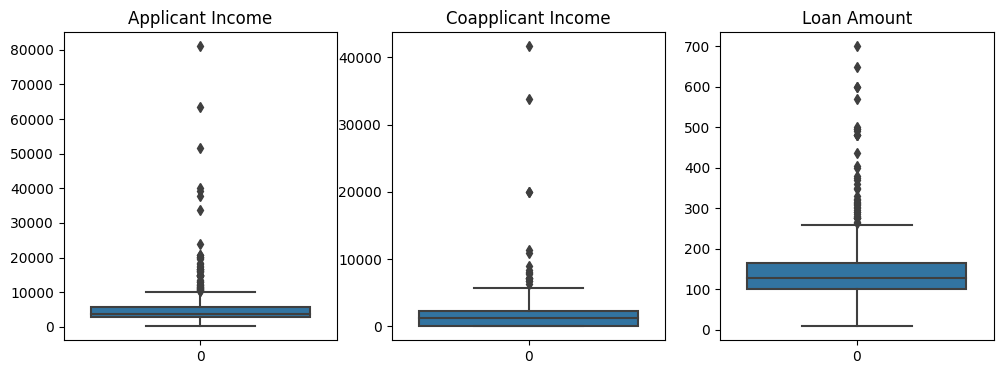

In [13]:
# ApplicantIncome	CoapplicantIncome	LoanAmount	
plt.rcParams['figure.figsize']=(12,4)

plt.subplot(1,3,1)
sns.boxplot(data['ApplicantIncome'])
plt.title('Applicant Income')

plt.subplot(1,3,2)
sns.boxplot(data['CoapplicantIncome'])
plt.title('Coapplicant Income')

plt.subplot(1,3,3)
sns.boxplot(data['LoanAmount'])
plt.title('Loan Amount')

plt.show()

**Observations**<br>
1. Applicant Income:
    * Majority of the applicant's income lies below 25k, hence we take the threshold as 25k
2. Coapplicant Income:
    * Majority of the coapplicant's income lies below 10k, hence we take the threshold as 10
3. Loan Amount:
    * Majority of the loan amount points lies below 400-500, hence we take the threshold as 400

In [14]:
print(f'Before removing the outliers: {data.shape}')
data = data[data['ApplicantIncome']<25000]
print(f'After removing the outliers: {data.shape}')

Before removing the outliers: (614, 13)
After removing the outliers: (607, 13)


In [15]:
print(f'Before removing the outliers: {data.shape}')
data= data[data['CoapplicantIncome']<10000]
print(f'After removing the outliers: {data.shape}')

Before removing the outliers: (607, 13)
After removing the outliers: (601, 13)


In [16]:
print(f'Before removing the outliers: {data.shape}')
data = data[data['LoanAmount']<400]
print(f'After removing the outliers: {data.shape}')

Before removing the outliers: (601, 13)
After removing the outliers: (590, 13)


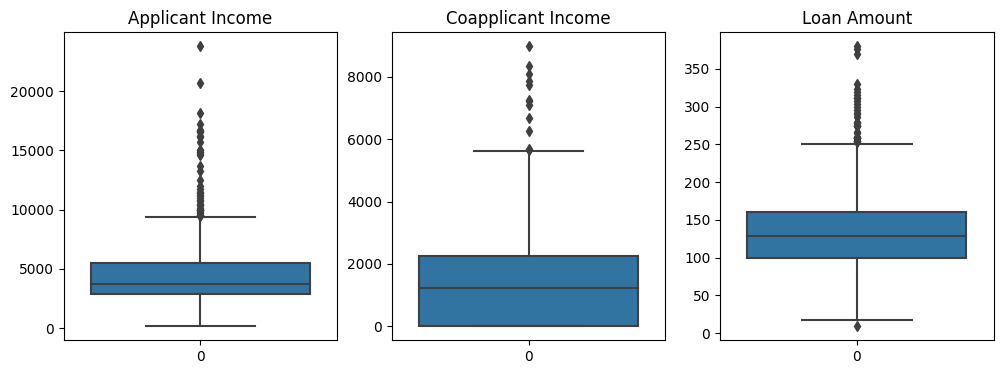

In [17]:
# ApplicantIncome	CoapplicantIncome	LoanAmount	
plt.rcParams['figure.figsize']=(12,4)

plt.subplot(1,3,1)
sns.boxplot(data['ApplicantIncome'])
plt.title('Applicant Income')

plt.subplot(1,3,2)
sns.boxplot(data['CoapplicantIncome'])
plt.title('Coapplicant Income')

plt.subplot(1,3,3)
sns.boxplot(data['LoanAmount'])
plt.title('Loan Amount')

plt.show()

**Observation**<br>
Post removal of outliers, we were able to retain 96% of data. i.e from 614 rows we have more 590 rows left.

#### Normalise the numerical data

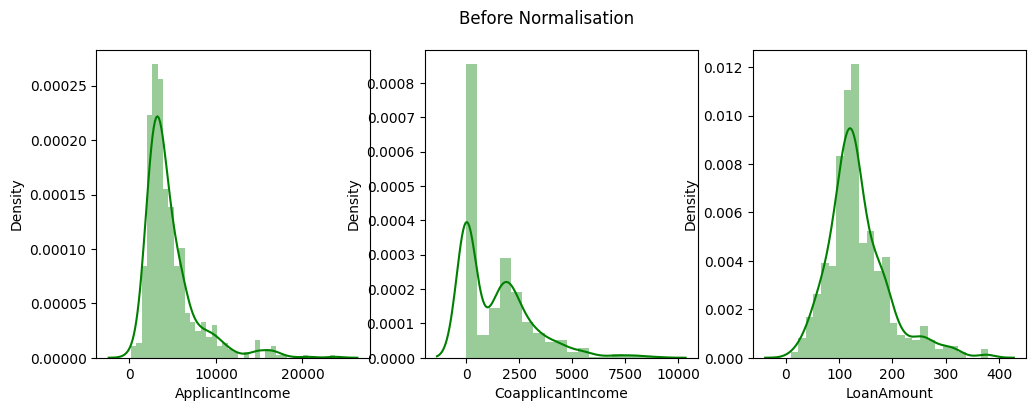

In [18]:
# Checking the rows with outliers are in normal distribution form

plt.subplot(1,3,1)
sns.distplot(data['ApplicantIncome'], color='green')

plt.subplot(1,3,2)
sns.distplot(data['CoapplicantIncome'], color='green')

plt.subplot(1,3,3)
sns.distplot(data['LoanAmount'], color='green')

plt.suptitle("Before Normalisation")
plt.show()

As the numerical data we are seeing is having different scales in x axis, hence we will normalise them.

In [19]:
# applying log normal distribution
data['ApplicantIncome'] = np.log(data['ApplicantIncome'])
data['CoapplicantIncome'] = np.log1p(data['CoapplicantIncome'])
data['LoanAmount'] = np.log(data['LoanAmount'])

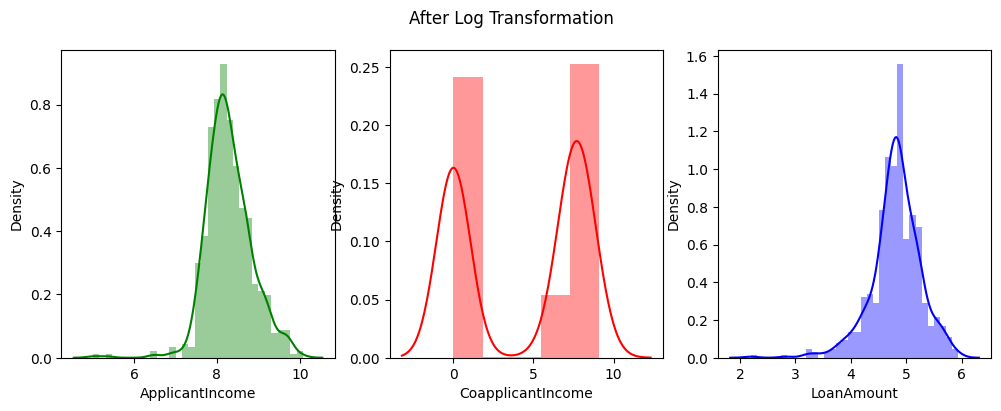

In [20]:
# Checking the rows with outliers are in normal distribution form

plt.subplot(1,3,1)
sns.distplot(data['ApplicantIncome'], color='green')

plt.subplot(1,3,2)
sns.distplot(data['CoapplicantIncome'], color='red')

plt.subplot(1,3,3)
sns.distplot(data['LoanAmount'], color='blue')

plt.suptitle("After Log Transformation")
plt.show()

numerical data is not normally distributed.

#### Analysis of dataset

In [21]:
# segregating numerical and categorical data
numerical = data.select_dtypes('number').columns.tolist()
categorical = data.select_dtypes('object').columns.tolist()

In [22]:
print("Numerical data columns:",numerical)
print("Categorical data columns:",categorical)

Numerical data columns: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
Categorical data columns: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


Visualizing the num and cat columns

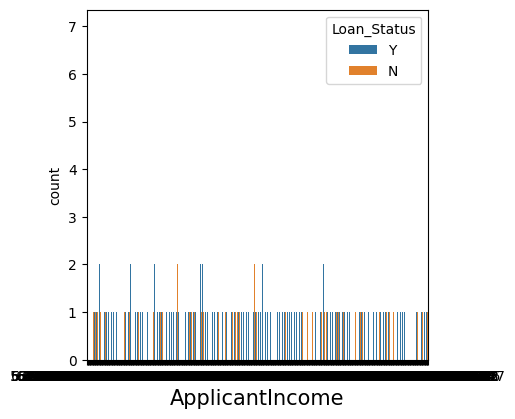

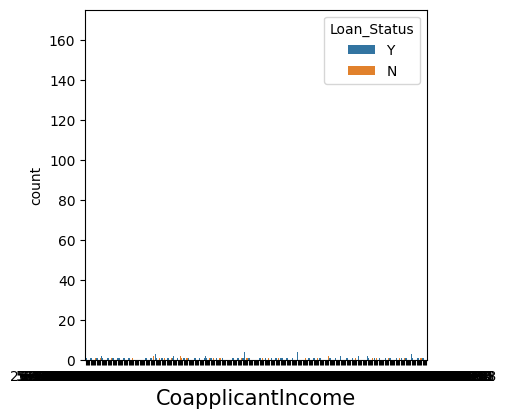

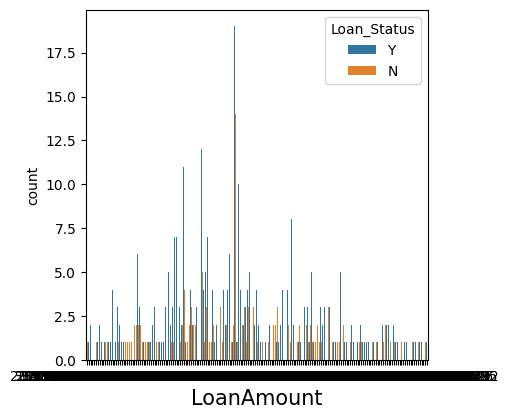

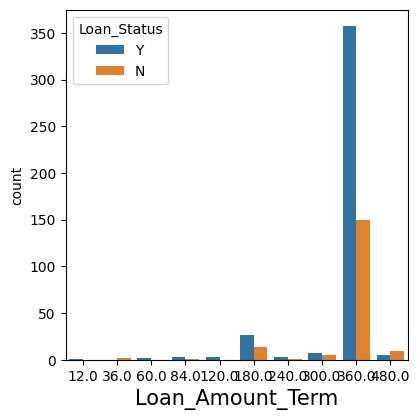

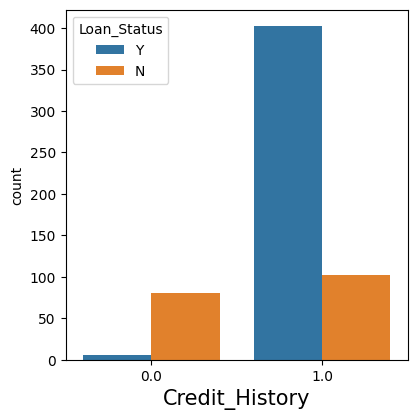

In [23]:
for i in numerical:
    plt.figure(figsize=(15,10))
    plt.subplot(2,3,1)
    sns.countplot(data = data, x=i, hue='Loan_Status')
    plt.xlabel(i, fontsize=15)

**Observation**<br>
Applicant who has a credit history are more likely for a loan approval

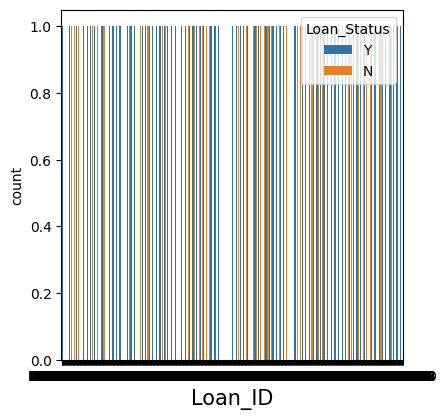

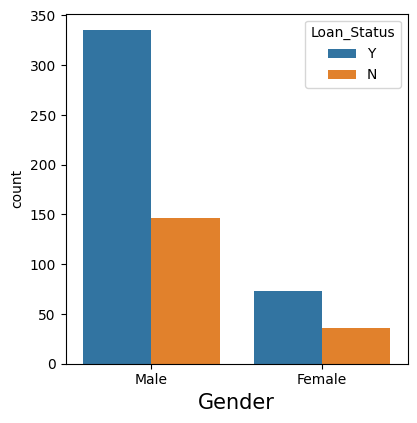

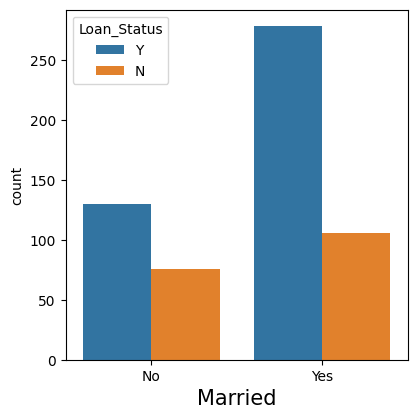

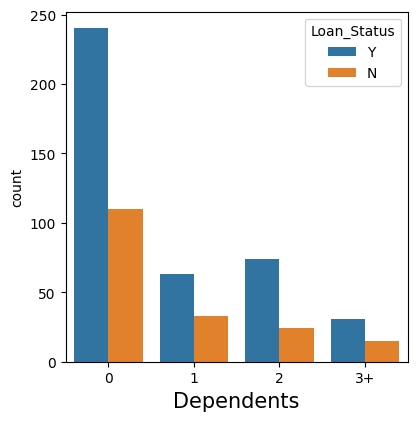

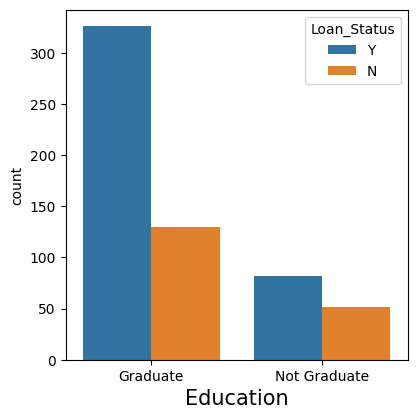

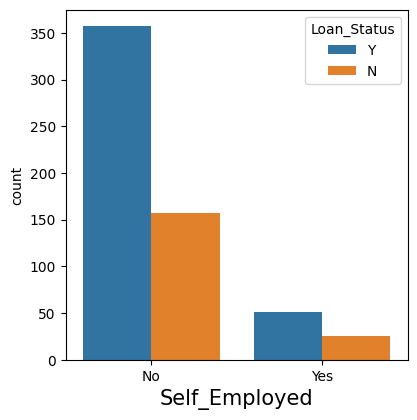

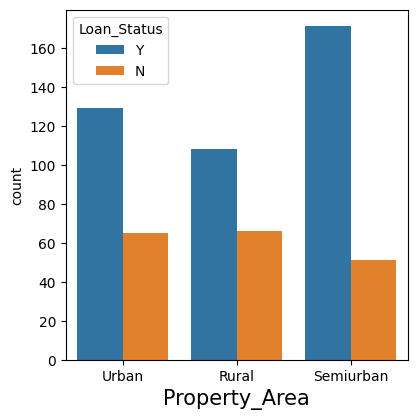

In [24]:
for i in categorical[:-1]:
    plt.figure(figsize=(15,10))
    plt.subplot(2,3,1)
    sns.countplot(data = data, x=i, hue='Loan_Status')
    plt.xlabel(i, fontsize=15)

**Observations:**<br>
1. Loan if approved for males than females
2. If the person is married then yes
3. Better the chance if no dependencies and he is graduated and not self-employed
4. A better chance of acceptance if an applicant is from semiurban than urban than rural.

#### Data Preparation

Handling the categorical data by encoding them..

In [25]:
data.select_dtypes('object').head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


In [26]:
# as the loanid plays no role for predicting the loan status hence we are dropping off loanid
data = data.drop(['Loan_ID'], axis=1)
data.select_dtypes('object').head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


In [27]:
cat_cols = data.select_dtypes('object').head().columns
print(f'Categorical columns: ',cat_cols,end="\n\n")
for i in cat_cols:
    print(data[i].value_counts(),end="\n")
    print('-'*30)

Categorical columns:  Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

Gender
Male      481
Female    109
Name: count, dtype: int64
------------------------------
Married
Yes    384
No     206
Name: count, dtype: int64
------------------------------
Dependents
0     350
2      98
1      96
3+     46
Name: count, dtype: int64
------------------------------
Education
Graduate        456
Not Graduate    134
Name: count, dtype: int64
------------------------------
Self_Employed
No     514
Yes     76
Name: count, dtype: int64
------------------------------
Property_Area
Semiurban    222
Urban        194
Rural        174
Name: count, dtype: int64
------------------------------
Loan_Status
Y    408
N    182
Name: count, dtype: int64
------------------------------


In [28]:
# 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Property_Area', 'Loan_Status'
data['Gender'] = data['Gender'].replace(('Male','Female'),(1,0))
data['Married'] = data['Married'].replace(('Yes','No'),(1,0))
data['Dependents'] = data['Dependents'].replace(('0','1','2','3+'),(0,1,1,1))
data['Education'] = data['Education'].replace(('Graduate','Not Graduate'),(1,0))
data['Self_Employed'] = data['Self_Employed'].replace(('Yes','No'),(1,0))
data['Property_Area'] = data['Property_Area'].replace(('Urban','Semiurban','Rural'),(1,1,0))
data['Loan_Status'] = data['Loan_Status'].replace(('Y','N'),(1,0))


In [29]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,8.674026,0.000000,4.852030,360.0,1.0,1,1
1,1,1,1,1,0,8.430109,7.319202,4.852030,360.0,1.0,0,0
2,1,1,0,1,1,8.006368,0.000000,4.189655,360.0,1.0,1,1
3,1,1,0,0,0,7.856707,7.765993,4.787492,360.0,1.0,1,1
4,1,0,0,1,0,8.699515,0.000000,4.948760,360.0,1.0,1,1


In [30]:
# dividing the dataset into dependent and independent variables
y = data['Loan_Status']
x = data.drop('Loan_Status',axis=1)

In [31]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,8.674026,0.000000,4.852030,360.0,1.0,1
1,1,1,1,1,0,8.430109,7.319202,4.852030,360.0,1.0,0
2,1,1,0,1,1,8.006368,0.000000,4.189655,360.0,1.0,1
3,1,1,0,0,0,7.856707,7.765993,4.787492,360.0,1.0,1
4,1,0,0,1,0,8.699515,0.000000,4.948760,360.0,1.0,1


In [32]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

#### Handling the imbalanced data

In [33]:
from imblearn.over_sampling import SMOTE

In [34]:
x_resample, y_resample = SMOTE().fit_resample(x,y.values.ravel())

In [35]:
# checking the difference and amount of over sampling done

print('x:',x_resample.shape, x.shape)
print('y:',y_resample.shape, y.shape)

x: (816, 11) (590, 11)
y: (816,) (590,)


#### Splitting the dataset

In [36]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_resample,y_resample, test_size=0.2, random_state=42)

In [37]:
print(x_train.shape)
print(y_train.shape)

(652, 11)
(652,)


In [38]:
print(x_test.shape)
print(y_test.shape)

(164, 11)
(164,)


#### Model Building

In [39]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [40]:
LR = LogisticRegression()
LR.fit(x_train, y_train)

LogisticRegression()

In [41]:
y_pred = LR.predict(x_test)

In [42]:
print("Training Accuracy:",LR.score(x_train,y_train))
print("Test Accuracy:",LR.score(x_test,y_test))

Training Accuracy: 0.7377300613496932
Test Accuracy: 0.75


In [43]:
from sklearn.metrics import classification_report

In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.66      0.73        85
           1       0.70      0.85      0.77        79

    accuracy                           0.75       164
   macro avg       0.76      0.75      0.75       164
weighted avg       0.76      0.75      0.75       164



In [45]:
print("LR Accuracy: ", accuracy_score(y_pred,y_test))

LR Accuracy:  0.75
